# Deluppgift 2
### Beskrivning

I  denna  uppgift  ska  du  använda  listan  kpiData  för  att  skapa  grafer  och  ett  stapeldiagram  enligt nedanstående  figur.  

##### OBS!  I  denna  uppgift  måste  du  själv  skriva  programkoden  för  summering  och  medelvärdesberäkningen. 

Programmet ska först fråga efter en månad (1 – 12). Därefter ska programmet beräkna medelvärdet 
av KPI för varje år  under åren 1980 – 2022 (år 2022 baseras medelvärdet på månaderna jan – juli). 
Resultatet  ska  sedan  ritas  ut  som  både  ett  linjediagram  (svart  linje)  och  som  ett  stapeldiagram. 
Tillsammans med ett linjediagram (röd linje) för KPI för den angivna månaden under tidsperioden 1980 
– 2022.  

Exempelkörning: (Kursiv text anger inmatning vid programkörning). 

Ange vilken månad som ska presenteras: 2 


### Tankebana

Jag kommer behöva:
- en egen funktion för summering
- en egen funktion för medelvärde
- ett värde på angiven månad
- ett genomsnittligt värde per år
- en tabell

Min tanke är att för både summering och medelvärde göra listor av de värden som ska räknas. Då hamnar alla element på samma rad och jag kan använda mig av len() och x.count() för att underlätta summering och medelvärde. Fråga är om det ska göras i en universell egendefinierad funktion? 

1. Fråga efter en månad (1-12)
    möjligtvis en kombination av indexering och for-sats? För att få ut alla årliga värden för angiven månad. 
2. 

##### kpiData (fake)

In [1]:
# 
# en variant av deluppgift 1 bara för att få fram listan kpiData. 
# 

import csv

def read_file(x):
    with open(x, 'r', encoding='UTF-8') as file:
        data_list = []
        csv_reader = csv.reader(file, delimiter = ';')
        for rad in csv_reader:
            data_list.append(rad)
        return data_list

file1 = 'kpi-1.csv'                                     
kpiData = read_file(file1)   

##### D2 - egendefinierade funktioner för summering och medelvärdesberäkning

In [2]:
def summa(x):
    s = 0
    for rad in x:
        s = s + rad
    return s

def medel(x):
    s = 0
    for rad in x:
        s = s + rad
    m = s / len(x)
    return m

##### D2 - månad

In [3]:
# Nuvarande problem är att månad 8-12 genererar "list index out of range". 
# Med mina yttre if-satser kommer jag runt det men jag tar gärna feedback. 
# Mina inre if-satser preventerar också list "index out of range".

print('Nedan graf kommer att visa ett genomsnittligt konsumentprisindex (KPI) mellan åren 1980 och 2022.\n')
m = int(input('Visa KPI för månad (1-12): '))
print('\n')

# Nedan skapar vi en endimensionell lista med alla värden från kolumnen av den månad som användaren anger. 
kpiDataManad = []
ca = 0                                                       # c för clock eller counter
cb = 1
for rad in kpiData:
    if m < 8:                                                # utan denna och kommande if-satser får jag "list index out of range", jag har inte hittat någon lösning men jag hittade ett knep som var att ta print(""index"") och se hur många index den skriver ut och begränsa sen for-satsen till det antalet index.
        ca = ca + 1                                          # Eftersom jag ger c ett nytt värde redan innan första loopen så undviker jag att få med månadens namn i listan och får bara värden.
        kpiDataManad.append(kpiData[ca][m])                  
        if ca > 42:
            break                                           
    if m >= 8:                                               
        cb = cb + 1
        kpiDataManad.append(kpiData[cb][m])
        if cb > 42:
            break                                            
        
kpiDataManad = [float(kpiDM) for kpiDM in kpiDataManad]      # Här använder jag list comprehension och gör om min nya lista från string till float för att kunna räkna (summa, medel) med innehållet.
print(kpiDataManad)                                          # TEST
print(len(kpiDataManad))                                     # TEST
print(summa(kpiDataManad))                                   # TEST
print(medel(kpiDataManad))                                   # TEST

Nedan graf kommer att visa ett genomsnittligt konsumentprisindex (KPI) mellan åren 1980 och 2022.

Visa KPI för månad (1-12): 7


[371.28, 342.23, 337.57, 335.8, 330.33, 323.69, 316.73, 313.43, 313.67, 313.55, 313.23, 311.13, 302.04, 298.8, 302.11, 289.49, 284.19, 279.4, 278.5, 276.8, 272.3, 266.9, 260.0, 257.6, 257.0, 257.3, 255.7, 254.8, 248.4, 241.9, 231.2, 227.1, 208.2, 187.9, 177.1, 166.9, 160.1, 153.8, 142.8, 132.9, 121.9, 112.6, 99.3]
43
10927.669999999998
254.13186046511623


##### D2 - medelvärde år

In [4]:
from statistics import mean

del kpiData[0]                                      # Ta bort månaderna. 
for i in range(len(kpiData)):                       # Ta bort årtalen. 
    for j in range(0, 1):
        del (kpiData[i][j])

for i in kpiData:                                   # Konvertera all data till floats. 
    for j, k in enumerate(i):
        i[j] = float(k)

kpiDataAr = [medel(x) for x in kpiData]
print(kpiDataAr)

[361.9985714285714, 343.1891666666666, 335.92250000000007, 334.26, 328.4008333333333, 322.1083333333333, 316.43, 313.34583333333336, 313.4925, 314.0566666666667, 314.1958333333334, 311.4291666666666, 303.46083333333337, 299.6591666666667, 300.6116666666667, 290.5108333333333, 284.2233333333333, 280.40833333333336, 279.15, 278.09999999999997, 272.84166666666664, 267.0833333333333, 260.71666666666664, 258.13333333333327, 256.96666666666664, 257.31666666666666, 255.9916666666667, 254.79166666666666, 248.50833333333335, 243.15833333333333, 232.35833333333332, 227.17500000000004, 207.77499999999998, 188.08333333333337, 176.70833333333334, 167.025, 160.25833333333335, 153.75, 143.20000000000002, 132.5666666666667, 121.72500000000001, 112.10833333333335, 100.00000000000001]


##### D2 - graf

In [5]:
kpiDataManad.reverse()
kpiDataAr.reverse()

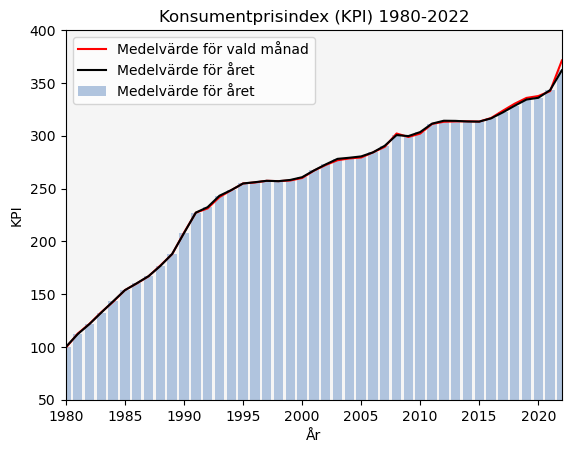

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.ylim(50, 400)
plt.xlim(1980, 2022)
#x = np.linspace(1980, 2022, 43)
#x42 = np.linspace(1980, 2022, 42)

plt.plot(x, kpiDataManad, color = 'red', label = 'Medelvärde för vald månad')
plt.plot(x, kpiDataAr, color = 'k', label = 'Medelvärde för året')
plt.bar(x, kpiDataAr, color = 'lightsteelblue', label = 'Medelvärde för året')

plt.title('Konsumentprisindex (KPI) 1980-2022')
plt.xlabel('År')
plt.ylabel('KPI')
b = plt.gca()
b.set_facecolor('whitesmoke')
plt.legend()
plt.show()